# Pymaceuticals Inc.
---

### Analysis

1. Effectiveness of Drug Regimens between the 4 analysed, Capomulin and Ramicane are showing promising result reducing tumor volumne compared to Infubinol and Ceftamin. 
2. Significant differenze in sampel size between Capomulin and Ramicane compared to Infubinol and Ceftamin, this should be taken into account when interpreting the result.
3. Gender distribution between male and female are almost equal amount in the study.
4. Potential outlier in Infubinol drug regimen in the analysis of tumor volume, this indicates anomalies and needs to be investigated.
5. Mouse treated with Capomulin seems to be reducing tumor size over time, this suggest this drug has positive effect.
6. There is a positive relationship between Mouse weight and Tumor volume, where the scatter plot and linier regression within the Capomulin regimen indicates, mouse with higher weights tend to have larger tumor volumes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Storing merged file in Data folder
complete_data_path = Path("Data")
complete_data_file_name = "complete_data.csv"
complete_data_output_path = complete_data_path / complete_data_file_name
complete_data.to_csv(complete_data_output_path, index=False)

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the number of unique mice IDs in the data
unique_mouse_id = len(complete_data["Mouse ID"].unique())
unique_mouse_id

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = complete_data.loc[complete_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id = complete_data.loc[complete_data["Mouse ID"] == "g989", :]
all_duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data[complete_data["Mouse ID"].isin(duplicate_mouse_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
clean_mouse_id = len(clean_df["Mouse ID"].unique())
clean_mouse_id

248

## Summary Statistics

In [7]:
drug_index = clean_df.set_index("Drug Regimen")
drug_index 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupby_drug_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
groupby_drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
groupby_drug_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
groupby_drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
groupby_drug_variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
groupby_drug_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
groupby_drug_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
groupby_drug_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
groupby_drug_err = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
groupby_drug_err

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Assemble the resulting series into a single summary DataFrame.
stat_sum = pd.DataFrame({"Mean Tumor Volume":groupby_drug_mean,
                        "Median Tumor Volume":groupby_drug_median,
                        "Tumor Volume Variance":groupby_drug_variance,
                        "Tumor Volume Std. Dev.":groupby_drug_std,
                        "Tumor Volume Std. Err.": groupby_drug_err})
stat_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_df = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [15]:
clean_drug_name = clean_df["Drug Regimen"].value_counts()
clean_drug_name

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

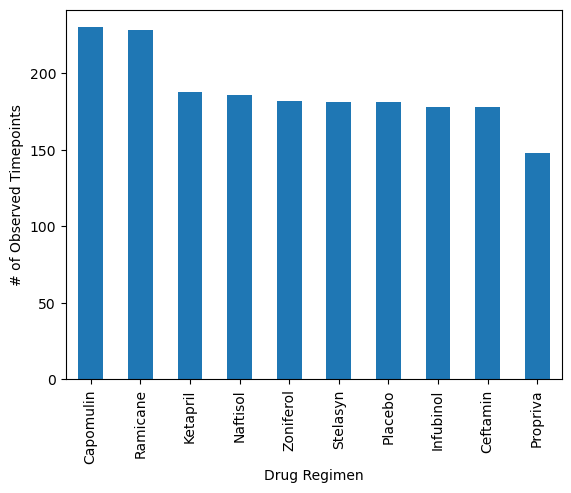

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = clean_drug_name.plot.bar(color="C0")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.show

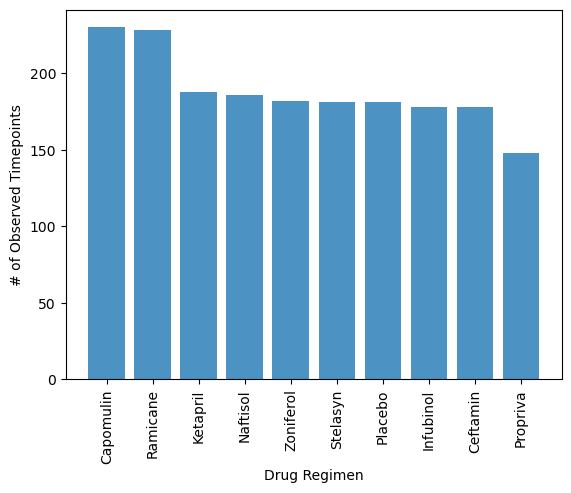

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_drug_name.index.values
y_axis = clean_drug_name.values
plt.bar(x_axis, y_axis, color='C0', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation="vertical")

plt.show()

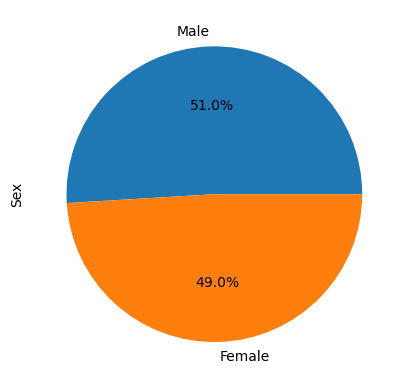

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

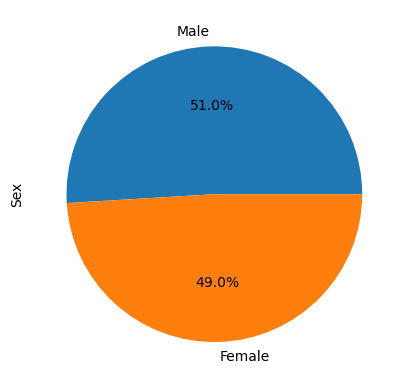

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = clean_df["Sex"].value_counts()
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

In [21]:
# Start by getting the last (greatest) timepoint for each mouse in Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for Capomulin
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# Reset the index for Infubinol _merge
Capomulin_merge.reset_index(inplace=True)

# Calculate the IQR and quantitatively determine if there are any potential outliers in Capomulin 
quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds for Capomulin 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [22]:
# Start by getting the last (greatest) timepoint for each mouse in Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for Ramicane
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

# Reset the index for Infubinol _merge
Ramicane_merge.reset_index(inplace=True)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane 
quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds for Ramicane 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [23]:
# Start by getting the last (greatest) timepoint for each mouse in Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for Infubinol
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

# Reset the index for Infubinol _merge
Infubinol_merge.reset_index(inplace=True)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol 
quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds for Infubinol
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [24]:
# Start by getting the last (greatest) timepoint for each mouse in Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint for Ceftamin
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

# Reset the index for Ceftamin_merge
Ceftamin_merge.reset_index(inplace=True)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds for Ceftamin
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [26]:
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


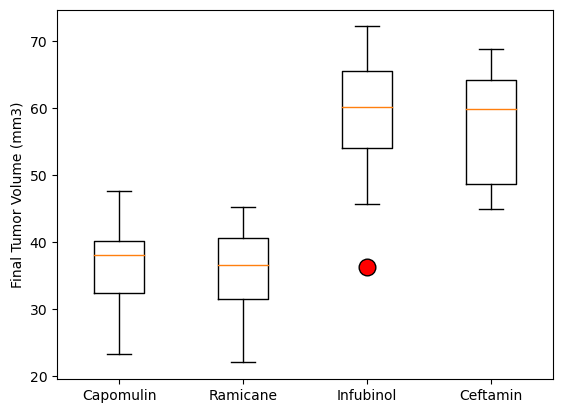

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.show()

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

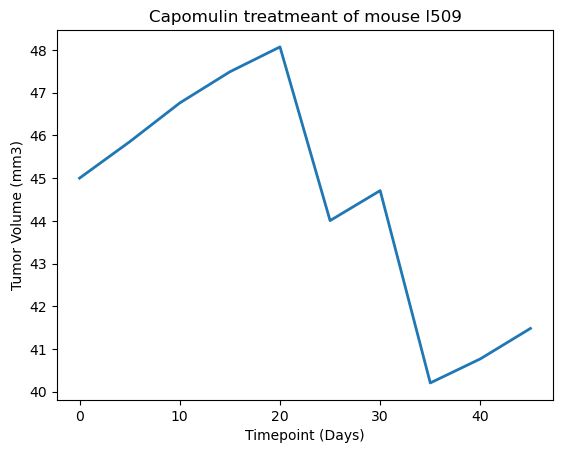

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15, color='C0', label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

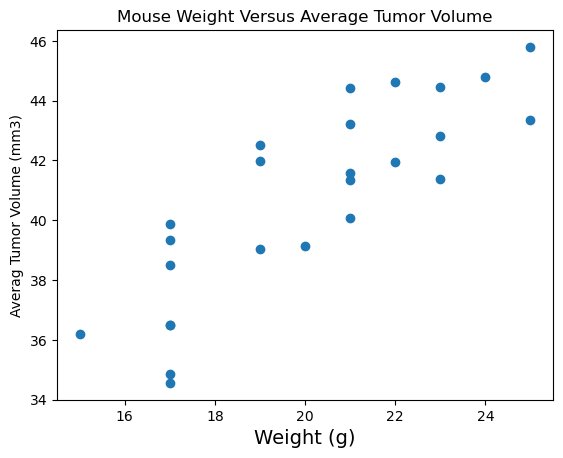

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color='C0')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


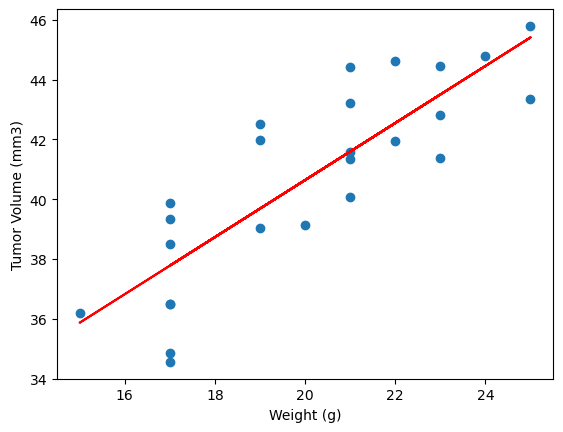

In [57]:
# Calculate the correlation coefficient
correlation = st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
regress_values = avg_capm_vol['Weight (g)'] * slope + intercept


# Plotting the data and regression line
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color='C0')
plt.plot(avg_capm_vol['Weight (g)'], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2, 3)}")
plt.show()